In [3]:
! pip install pytrends

     |████████████████████████████████| 4.5 MB 3.5 MB/s 


In [4]:
from pytrends.request import TrendReq
# import plotly.express as px

First, we need to connect to Google. We can use the method `TrendReq` and pass several parameters. For this example, we'll use `hl` and `tz`. 

In [ ]:
# connect to google
pytrends = TrendReq(hl='en-US', tz=360)

The `hl` parameter specifies host language for accessing Google Trends. Please note that only https proxies will work, and you need to add the port number after the proxy ip address. The `tz` parameter is the timezone offset. So for example, US CST is `360`.

Next, we use the method `build_payload` to tell the API which keywords we want to search for.

In [21]:
# keywords to search for
pytrends.build_payload(kw_list=['data science'])

The API method `Interest over Time` returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.

In [22]:
time_df = pytrends.interest_over_time()

In [55]:
time_df.head()

,data science,isPartial
date,,
2016-04-17,26,False
2016-04-24,24,False
2016-05-01,22,False
2016-05-08,24,False
2016-05-15,27,False


In [44]:
## plotly graph
# px.line(time_df[['data science']])

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

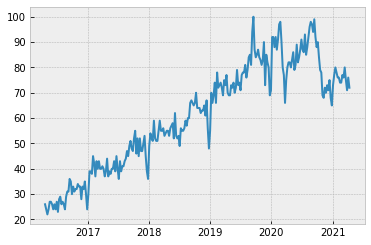

In [37]:
plt.plot(time_df[['data science']])

In [38]:
region_df = pytrends.interest_by_region()

In [39]:
region_df.head()

,data science
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0


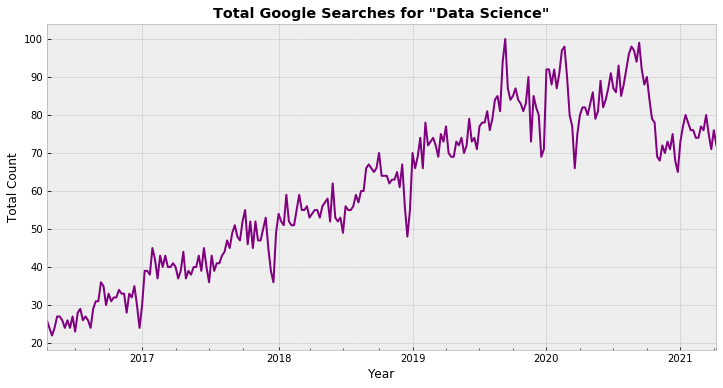

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
time_df['data science'].plot(color='purple')
plt.title('Total Google Searches for "Data Science"', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.savefig('data_science.png', bbox_inches = "tight", pad_inches=.5)